# Clustering analysis - Pokemon Unite

Author: Bruno Borges Nov, 2023 


### Context:

Pokemon Unite is a new MOBA(Multiplayer Online Battle Arena) released for Mobile and Nintendo Switch. The game became instantly popular after its initial release on Nintendo Switch but it has grown even more after being released on Mobile devices and even won game of the year on play store in US region and several other awards in different categories in several other regions in the annual Google Play Awards 2021.


### Goal:

Perform a cluster analysis using a dataframe from the Pokemon Unite game. The end goal is to explore different approaches such as Hierarchical and Non-Hierarchical clustering analysis. 


### Dataset:

The data is collected from the official Pokemon Unite website : https://unite.pokemon.com/en-us/ and processed and cleaned by [Shashanka Shekhar](https://www.kaggle.com/vishushekhar). It has all the information about every pokemon released in the game till Oct, 8th, 2023. 

* Name: Name of the Pokemon.
* Description: Description of the pokemon.
* Role: Role of the pokemon in the game.
* Ranged_or_Melee: Whether the attacks of the pokemon are ranged or close
* UsageDifficulty: How easy is to fully utilize the moves to make most out of the pokemon.
* Offense: Offense stat of the pokemon out of 5.0
* Endurance: Endurance stat of the pokemon out of 5.0
* Mobility: Mobility stat of the pokemon out of 5.0
* Scoring: Scoring stat of the pokemon out of 5.0
* Support: Support stat of the pokemon out of 5.0


### To Do:

1) Initiate the exploratory analysis
2) Implement the clustering analysis


### Notes

- 


------

## Importing packages

In [43]:
# loading packages
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import scipy.stats as stats
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import plotly.express as px 
import plotly.io as pio

## Loading Data

In [44]:
#loading data from csv file
df_main = pd.read_csv("data-raw/PokemonUniteData.csv")

In [45]:
df_main.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             61 non-null     object 
 1   Description      61 non-null     object 
 2   Role             61 non-null     object 
 3   Ranged_or_Melee  61 non-null     object 
 4   UsageDifficulty  61 non-null     object 
 5   Offense          61 non-null     float64
 6   Endurance        61 non-null     float64
 7   Mobility         61 non-null     float64
 8   Scoring          61 non-null     float64
 9   Support          61 non-null     float64
dtypes: float64(5), object(5)
memory usage: 4.9+ KB


In [46]:
df_main['Total'] = df_main['Offense'] + df_main['Endurance'] + df_main['Mobility'] + df_main['Scoring'] + df_main['Support']

In [47]:
df_main['Average'] = df_main['Total'] / 5

## EDA

In [48]:
# skiping this phase for now.

## Hierarchical Cluster

#### Agglomerative 

In [49]:
# step 1: dropping categorical variables
df_drop = df_main[['Name','Offense', 'Endurance', 'Mobility', 'Scoring', 'Support']]

df_drop = df_drop.set_index('Name')

df_drop.head()

,Offense,Endurance,Mobility,Scoring,Support
Name,,,,,
Mimikyu,4.0,2.5,3.5,1.0,1.0
Blaziken,4.0,2.5,4.0,1.0,0.5
Mewtwo(Mewtwo),3.0,3.0,2.5,2.0,2.0
Mewtwo(Mega Mewtwo X),4.0,4.0,3.0,2.0,2.0
Mewtwo(Mega Mewtwo Y),5.0,3.0,3.5,2.0,2.0


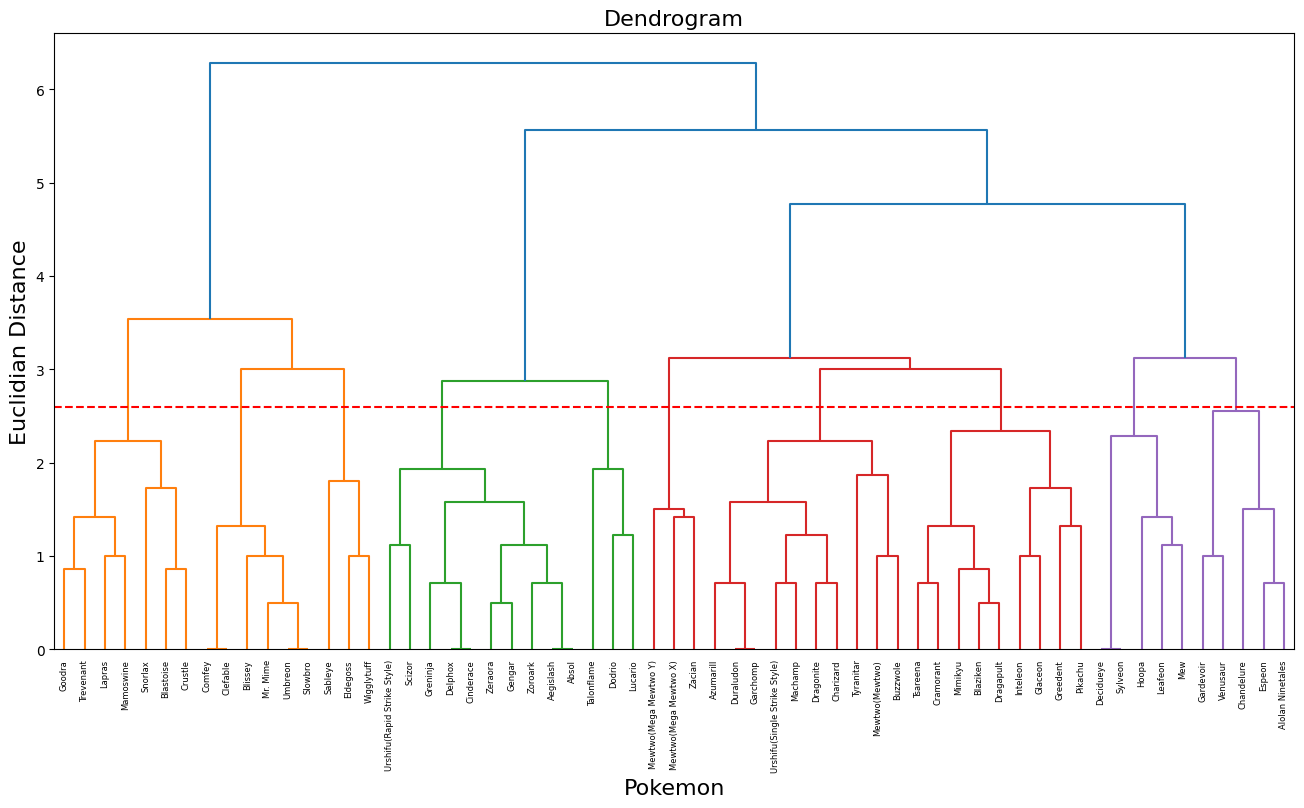

In [50]:
# generating a dendrogram
plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(
                sch.linkage(
                    df_drop,
                    method = 'complete',
                    metric = 'euclidean'
                ),
                labels = list(df_drop.index)
             )

plt.title('Dendrogram', fontsize=16)
plt.xlabel('Pokemon', fontsize=16)
plt.ylabel('Euclidian Distance', fontsize=16)
plt.axhline(y = 2.6, color = 'red', linestyle = '--')

plt.show()

In [51]:
# adding a columns with the cluster data to the dataframe
cluster_complete = AgglomerativeClustering(
                    n_clusters = 4,
                    affinity = 'euclidean',
                    linkage = 'complete'
               )
point_cluster_poke = cluster_complete.fit_predict(df_drop)

# return a list with the cluster for each observation
print(point_cluster_poke, "\n")

# create new column with clusters complete
df_main['cluster_complete'] = point_cluster_poke

# showing the dataframe with new column
df_main.head(10)

[3 3 3 3 3 3 1 0 1 0 0 3 0 3 3 2 0 2 0 2 2 1 3 3 3 2 1 3 3 1 2 0 3 3 1 3 1
 0 0 0 1 2 3 3 0 0 2 0 2 2 1 0 0 2 3 0 1 3 2 3 2] 



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support,Total,Average,cluster_complete
0,Mimikyu,“Creep” it real with a Melee All-Rounder that’...,All-Rounder,Melee,Intermediate,4.0,2.5,3.5,1.0,1.0,12.0,2.4,3
1,Blaziken,Get fired up with this Melee All-Rounder that ...,All-Rounder,Melee,Expert,4.0,2.5,4.0,1.0,0.5,12.0,2.4,3
2,Mewtwo(Mewtwo),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,3.0,3.0,2.5,2.0,2.0,12.5,2.5,3
3,Mewtwo(Mega Mewtwo X),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,4.0,4.0,3.0,2.0,2.0,15.0,3.0,3
4,Mewtwo(Mega Mewtwo Y),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,5.0,3.0,3.5,2.0,2.0,15.5,3.1,3
5,Inteleon,Stay cool and steady your aim with this Ranged...,Attacker,Ranged,Intermediate,4.5,1.5,3.5,1.5,0.5,11.5,2.3,3
6,Leafeon,Soak up the sun and channel your solar power w...,Speedster,Melee,Intermediate,3.5,1.5,2.5,2.5,2.5,12.5,2.5,1
7,Umbreon,Bask in the moonlight as you eclipse the compe...,Defender,Melee,Novice,1.5,4.0,1.5,1.5,4.0,12.5,2.5,0
8,Chandelure,Ignite your next fight on Aeos Island with thi...,Attacker,Ranged,Novice,5.0,1.0,1.0,2.0,3.0,12.0,2.4,1
9,Lapras,Transport your team to victory with the Ranged...,Defender,Ranged,Intermediate,3.0,3.5,2.0,2.0,3.0,13.5,2.7,0


In [52]:
print(f"For this analysis we considered: {len(df_main['cluster_complete'].unique())} clusters")

For this analysis we considered: 4 clusters


## Non-Hierarchical Cluster

#### K-means


In [53]:
# considering the output of the hierarchical analysis
kmeans = KMeans(
            n_clusters = 4,
            init = 'random'
         ).fit(df_drop)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [54]:
# to identify generated clusters
kmeans_clusters = kmeans.labels_

print(kmeans_clusters)

# creating a new column with clusters kmeans
df_main['cluster_kmeans'] = kmeans_clusters

# showing the dataframe with new column
df_main.head(10)

[3 2 3 3 3 2 1 0 1 0 0 3 0 2 3 2 0 2 0 2 2 1 3 3 3 2 1 3 3 1 2 0 3 3 1 3 1
 0 0 0 1 2 3 3 0 0 2 0 2 2 3 0 0 2 3 0 1 3 2 3 2]


,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support,Total,Average,cluster_complete,cluster_kmeans
0,Mimikyu,“Creep” it real with a Melee All-Rounder that’...,All-Rounder,Melee,Intermediate,4.0,2.5,3.5,1.0,1.0,12.0,2.4,3,3
1,Blaziken,Get fired up with this Melee All-Rounder that ...,All-Rounder,Melee,Expert,4.0,2.5,4.0,1.0,0.5,12.0,2.4,3,2
2,Mewtwo(Mewtwo),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,3.0,3.0,2.5,2.0,2.0,12.5,2.5,3,3
3,Mewtwo(Mega Mewtwo X),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,4.0,4.0,3.0,2.0,2.0,15.0,3.0,3,3
4,Mewtwo(Mega Mewtwo Y),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,5.0,3.0,3.5,2.0,2.0,15.5,3.1,3,3
5,Inteleon,Stay cool and steady your aim with this Ranged...,Attacker,Ranged,Intermediate,4.5,1.5,3.5,1.5,0.5,11.5,2.3,3,2
6,Leafeon,Soak up the sun and channel your solar power w...,Speedster,Melee,Intermediate,3.5,1.5,2.5,2.5,2.5,12.5,2.5,1,1
7,Umbreon,Bask in the moonlight as you eclipse the compe...,Defender,Melee,Novice,1.5,4.0,1.5,1.5,4.0,12.5,2.5,0,0
8,Chandelure,Ignite your next fight on Aeos Island with thi...,Attacker,Ranged,Novice,5.0,1.0,1.0,2.0,3.0,12.0,2.4,1,1
9,Lapras,Transport your team to victory with the Ranged...,Defender,Ranged,Intermediate,3.0,3.5,2.0,2.0,3.0,13.5,2.7,0,0


In [55]:
# Identifying the centroid coordinates of the final clusters
cent_finals = pd.DataFrame(kmeans.cluster_centers_)
cent_finals.columns = df_drop.columns
cent_finals.index.name = 'cluster'
cent_finals


,Offense,Endurance,Mobility,Scoring,Support
cluster,,,,,
0,1.750000,3.531250,1.875000,1.937500,3.500000
1,3.888889,1.611111,1.888889,2.555556,2.944444
2,3.718750,1.968750,3.812500,2.531250,0.531250
3,3.975000,2.875000,2.650000,1.975000,1.100000


In [56]:
# visualizing the main dataframa
df_main.head()

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support,Total,Average,cluster_complete,cluster_kmeans
0,Mimikyu,“Creep” it real with a Melee All-Rounder that’...,All-Rounder,Melee,Intermediate,4.0,2.5,3.5,1.0,1.0,12.0,2.4,3,3
1,Blaziken,Get fired up with this Melee All-Rounder that ...,All-Rounder,Melee,Expert,4.0,2.5,4.0,1.0,0.5,12.0,2.4,3,2
2,Mewtwo(Mewtwo),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,3.0,3.0,2.5,2.0,2.0,12.5,2.5,3,3
3,Mewtwo(Mega Mewtwo X),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,4.0,4.0,3.0,2.0,2.0,15.0,3.0,3,3
4,Mewtwo(Mega Mewtwo Y),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,5.0,3.0,3.5,2.0,2.0,15.5,3.1,3,3


In [57]:
# visualizing the dataframa with only numeric variables
df_drop.head()


,Offense,Endurance,Mobility,Scoring,Support
Name,,,,,
Mimikyu,4.0,2.5,3.5,1.0,1.0
Blaziken,4.0,2.5,4.0,1.0,0.5
Mewtwo(Mewtwo),3.0,3.0,2.5,2.0,2.0
Mewtwo(Mega Mewtwo X),4.0,4.0,3.0,2.0,2.0
Mewtwo(Mega Mewtwo Y),5.0,3.0,3.5,2.0,2.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



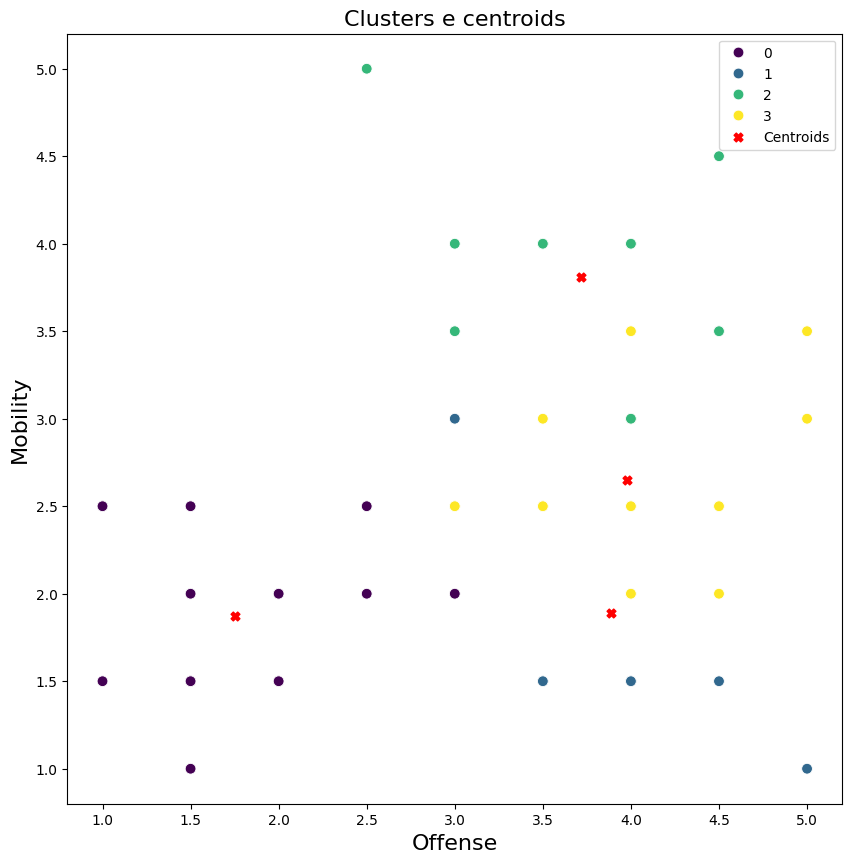

In [58]:
# plotting the observations and their clusters' centroids

plt.figure(figsize=(10,10))

pred_y = kmeans.fit_predict(df_drop)

sns.scatterplot(
    x='Offense',
    y='Mobility',
    data=df_main,
    hue='cluster_kmeans',
    palette='viridis',
    s=60
)


plt.scatter(cent_finals['Offense'], cent_finals['Mobility'], s = 40, c = 'red', label = 'Centroids', marker="X")
plt.title('Clusters e centroids', fontsize=16)
plt.xlabel('Offense', fontsize=16)
plt.ylabel('Mobility', fontsize=16)
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

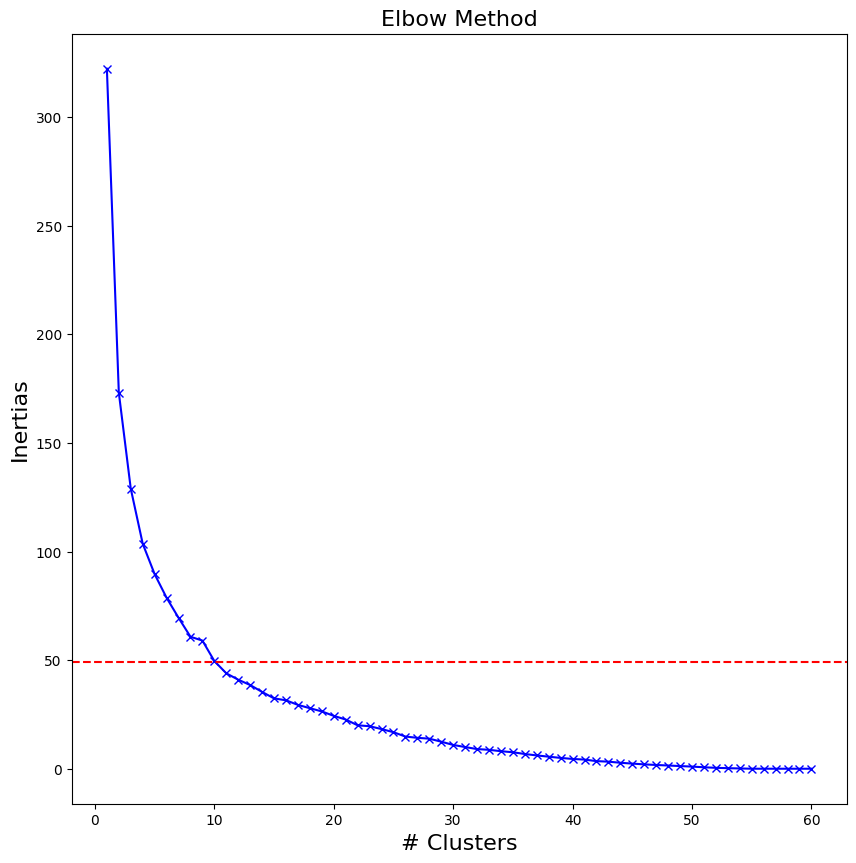

In [59]:
# Elbow method to identify the number of clusters
## Created based on "inertia": distance from each observation to the centroid of its cluster
## The closer they are to each other and to the centroid, the lower the inertia

inertia = []
K = range(1,df_drop.shape[0])
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_drop)
    inertia.append(kmeanModel.inertia_)
    
    
plt.figure(figsize=(10,10))
plt.plot(K, inertia, 'bx-')
plt.axhline(y = 49, color = 'red', linestyle = '--')
plt.xlabel('# Clusters', fontsize=16)
plt.ylabel('Inertias', fontsize=16)
plt.title('Elbow Method', fontsize=16)
plt.show()

In [60]:
# F-statistic

# One-factor variance analysis:
# The variables that most contribute to the formation of at least one of the clusters


def teste_f_kmeans(kmeans, dataframe):
    
    variables = dataframe.columns

    centroids = pd.DataFrame(kmeans.cluster_centers_)
    centroids.columns = dataframe.columns
    centroids
    
    # print("Centroids: \n", centroids ,"\n")

    df = dataframe[variables]

    unique, counts = np.unique(kmeans.labels_, return_counts=True)

    dic = dict(zip(unique, counts))

    qnt_clusters = kmeans.n_clusters

    observations = len(kmeans.labels_)

    df['cluster'] = kmeans.labels_

    output = []

    for variable in variables:

        dic_var={'Variable':variables}

        # variability between groups

        variability_between_groups = np.sum([dic[index]*np.square(observations - df[variable].mean()) for index, observations in enumerate(centroids[variable])])/(qnt_clusters - 1)

        dic_var['variability_between_groups'] = variability_between_groups

        variability_inside_groups = 0

        for group in unique:

            group = df[df.cluster == group]

            variability_inside_groups += np.sum([np.square(observations - group[variable].mean()) for observations in group[variable]])/(observations - qnt_clusters)

        dic_var['variability_inside_groups'] = variability_inside_groups

        dic_var['F'] =  dic_var['variability_between_groups']/dic_var['variability_inside_groups']
        
        dic_var['sig F'] =  1 - stats.f.cdf(dic_var['F'], qnt_clusters - 1, observations - qnt_clusters)

        output.append(dic_var)

    df = pd.DataFrame(output)
    
    # print(df)

    return df

# The values of the F-statistic are sensible to the size of the sample

output = teste_f_kmeans(kmeans,df_drop)

print(output)

                                            Variable  \
0  Index(['Offense', 'Endurance', 'Mobility', 'Sc...   
1  Index(['Offense', 'Endurance', 'Mobility', 'Sc...   
2  Index(['Offense', 'Endurance', 'Mobility', 'Sc...   
3  Index(['Offense', 'Endurance', 'Mobility', 'Sc...   
4  Index(['Offense', 'Endurance', 'Mobility', 'Sc...   

   variability_between_groups  variability_inside_groups          F  \
0                   17.823734                   0.326505  54.589531   
1                   10.177577                   0.399915  25.449368   
2                   12.146395                   0.274147  44.306110   
3                    1.669249                   0.440905   3.785959   
4                   31.138511                   0.372923  83.498555   

          sig F  
0  1.110223e-16  
1  1.412983e-10  
2  6.550316e-15  
3  1.513148e-02  
4  1.110223e-16  


In [104]:
# 3D graph of the clusters

pio.renderers.default='browser'

fig = px.scatter_3d(df_main, 
            x='Offense', 
            y='Scoring', 
            z='Mobility',
            color='cluster_kmeans',
            hover_name='Name',
            title='Clustering analysis - Pokemon Unite',
            size='Total'
        )

fig.update_traces(marker=dict(size=15, opacity=0.8))


fig.show()

In [100]:
# 2D graph of the clusters

fig = px.scatter(data_frame=df_main,
        x='Offense',
        y='Mobility',
        color='cluster_kmeans',
        hover_name='Name',
        size='Total',
        facet_col="Role",
        title="Clustering analysis - Pokemon Unite"
     )


fig.show()

